In [24]:
import numpy as np
import scipy as sp
from scipy import linalg as la
from matplotlib import pyplot as plt
from scipy import interpolate, optimize
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D, x

# Problem 1

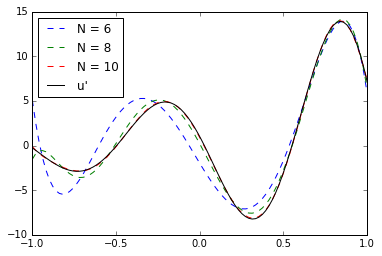

In [12]:
u = lambda x: np.exp(x)*np.cos(6*x)
uprime = lambda x: u(x) - 6*np.exp(x)*np.sin(6*x)
N = [6,8,10]
X = np.linspace(-1,1, 100)

for n in N:
    D, x = cheb(n)
    approximation = interpolate.barycentric_interpolate(x,D.dot(u(x)), X)
    plt.plot(X,approximation, '--', label="N = {}".format(n))
plt.plot(X,uprime(X), 'k', label="u'")
plt.xlim(-1,1)
plt.legend(loc=2)
plt.show()

# Problem 2

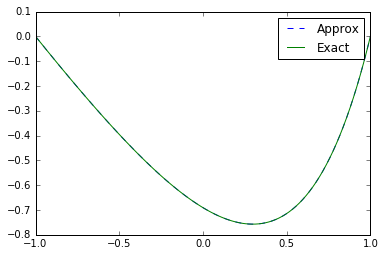

In [14]:
f = lambda x: np.exp(2*x)
X = np.linspace(-1,1, 100)
N = 8
D, x = cheb(N)
F = f(x)
D2 = np.dot(D,D)
D2[0,:], D2[-1,:] = 0,0
D2[0,0], D2[-1,-1] = 1,1
F[0], F[-1] = 0,0
U = la.solve(D2, F)
approximation = interpolate.barycentric_interpolate(x,U,X)
analytic_solution = lambda t: .25*(-np.cosh(2) - np.sinh(2)*t + np.exp(2*t))
plt.plot(X,approximation, '--', label="Approx")
plt.plot(X,analytic_solution(X), label="Exact")
plt.xlim(-1,1)
plt.legend()
plt.show()

# Problem 3

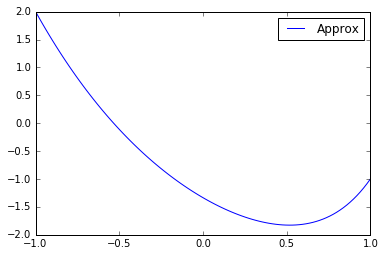

In [18]:
f = lambda x: np.exp(3*x)
X = np.linspace(-1,1, 100)
N = 8
D, x = cheb(N)
F = f(x)
D2 = np.dot(D,D) + D
D2[0,:], D2[-1,:] = 0,0
D2[0,0], D2[-1,-1] = 1,1
F[0], F[-1] = -1,2
U = la.solve(D2, F)
approximation = interpolate.barycentric_interpolate(x,U,X)
plt.plot(X,approximation, label="Approx")
plt.xlim(-1,1)
plt.legend()
plt.show()

# Problem 4

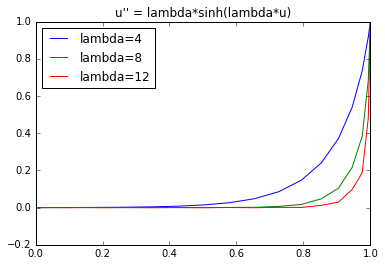

In [23]:
N = 20
D,x = cheb(N)
x_scaled = x*.5 + .5
D2 = np.dot(D,D)
for lmbda in [4,8,12]:
    def objective(U):
        obj = np.dot(D2, U) - lmbda*np.sinh(lmbda*U)
        obj[0], obj[-1] = U[0] - 1, U[-1] - 0
        return obj
    x0 = np.ones_like(x)
    u = optimize.root(objective, x0).x
    plt.plot(x_scaled, u, label = "lambda={}".format(lmbda))
plt.legend(loc=2)
plt.title("u'' = lambda*sinh(lambda*u)")
plt.xlim(0,1)
plt.show()

# Problem 5

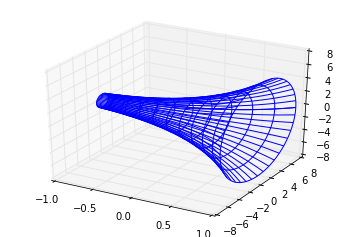

In [25]:
N = 50
X = np.linspace(-1,1,100)
D,x = cheb(N)
D2 = np.dot(D,D)
def F(U):
    obj = U*np.dot(D2, U) - np.dot(D,U)*np.dot(D,U)
    obj = obj - np.ones_like(obj)
    obj[0], obj[-1] = U[0]-7, U[-1]-1
    return obj
x0 = 2*np.ones_like(x)
u = optimize.root(F, x0).x
approx = interpolate.barycentric_interpolate(x,u,X)
theta = np.linspace(0, 2*np.pi, 401)
X, T = np.meshgrid(X,theta)
Y, Z = approx*np.cos(T), approx*np.sin(T)
figure = plt.figure()
ax = figure.gca(projection="3d")
ax.plot_wireframe(X, Y, Z, rstride = 10, cstride = 10)
plt.show()

In [ ]:
3